# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={"4769179bd11540ebfaf3f71d197ebcc1"}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q=' + city + '&units=imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        resp = requests.get(city_url)

        # Check the status code before assigning the response to our usable data.
        if resp.status_code == 200:
            city_weather = resp.json()

        # Our request failed: skip to the next iteration after making this known.
        else:
            print("There was an error making the request to OpenWeatherApi.")
            pass

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get('coord').get('lat')
        city_lng = city_weather.get('coord').get('lon')
        city_max_temp = city_weather.get('main').get('temp_max')
        city_humidity = city_weather.get('main').get('humidity')
        city_clouds = city_weather.get('clouds').get('all')
        city_wind = city_weather.get('wind').get('speed')
        city_country = city_weather.get('sys').get('country')
        city_date = city_weather.get('dt')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # Wait a second so that we don't make the API mad at us.
        time.sleep(1)
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        time.sleep(1)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | monrovia
Processing Record 6 of Set 1 | louga
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | kone
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | newman
Processing Record 12 of Set 1 | bairnsdale
Processing Record 13 of Set 1 | north bend
Processing Record 14 of Set 1 | taiohae
There was an error making the request to OpenWeatherApi.
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | buurhakaba
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | trujillo
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | iskateley
Proces

Processing Record 34 of Set 4 | gizo
Processing Record 35 of Set 4 | flying fish cove
Processing Record 36 of Set 4 | prokop'yevsk
Processing Record 37 of Set 4 | tofol
Processing Record 38 of Set 4 | khovd
Processing Record 39 of Set 4 | aykhal
Processing Record 40 of Set 4 | malayer
Processing Record 41 of Set 4 | umm kaddadah
Processing Record 42 of Set 4 | ovruch
Processing Record 43 of Set 4 | dire
Processing Record 44 of Set 4 | el granada
Processing Record 45 of Set 4 | kasane
Processing Record 46 of Set 4 | kirakira
Processing Record 47 of Set 4 | deqing
Processing Record 48 of Set 4 | invercargill
Processing Record 49 of Set 4 | muntok
Processing Record 0 of Set 5 | tralee
Processing Record 1 of Set 5 | tsubata
Processing Record 2 of Set 5 | nyrob
Processing Record 3 of Set 5 | stornoway
Processing Record 4 of Set 5 | jiexiu
Processing Record 5 of Set 5 | yashkul'
Processing Record 6 of Set 5 | bodaybo
Processing Record 7 of Set 5 | tuy hoa
Processing Record 8 of Set 5 | lange

Processing Record 25 of Set 8 | coquimbo
Processing Record 26 of Set 8 | susuman
Processing Record 27 of Set 8 | oranjestad
Processing Record 28 of Set 8 | goronyo
Processing Record 29 of Set 8 | dunedin
Processing Record 30 of Set 8 | pahrump
Processing Record 31 of Set 8 | jamaame
Processing Record 32 of Set 8 | vorkuta
Processing Record 33 of Set 8 | prado
Processing Record 34 of Set 8 | sharm el-sheikh
Processing Record 35 of Set 8 | cabo san lucas
Processing Record 36 of Set 8 | niafunke
Processing Record 37 of Set 8 | coahuayana de hidalgo
Processing Record 38 of Set 8 | pocoes
Processing Record 39 of Set 8 | cao bang
Processing Record 40 of Set 8 | bosaso
Processing Record 41 of Set 8 | rock springs
Processing Record 42 of Set 8 | peace river
Processing Record 43 of Set 8 | dalandzadgad
Processing Record 44 of Set 8 | soio
Processing Record 45 of Set 8 | manismata
Processing Record 46 of Set 8 | ciudad bolivar
Processing Record 47 of Set 8 | usogorsk
Processing Record 48 of Set 

Processing Record 11 of Set 12 | udangudi
Processing Record 12 of Set 12 | bellary
Processing Record 13 of Set 12 | bridgewater
Processing Record 14 of Set 12 | kataragama
There was an error making the request to OpenWeatherApi.
Processing Record 15 of Set 12 | el alto
Processing Record 16 of Set 12 | saint-francois
Processing Record 17 of Set 12 | qurayyat
Processing Record 18 of Set 12 | navia
Processing Record 19 of Set 12 | paradip garh
Processing Record 20 of Set 12 | saynshand
Processing Record 21 of Set 12 | lakhdenpokh'ya
Processing Record 22 of Set 12 | ullal
Processing Record 23 of Set 12 | mogadishu
Processing Record 24 of Set 12 | brookings
Processing Record 25 of Set 12 | barah
Processing Record 26 of Set 12 | shaowu
Processing Record 27 of Set 12 | el calafate
Processing Record 28 of Set 12 | impfondo
Processing Record 29 of Set 12 | sechura
Processing Record 30 of Set 12 | mhamid
Processing Record 31 of Set 12 | pangody
Processing Record 32 of Set 12 | adelia maria
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          609
Lat           609
Lng           609
Max Temp      609
Humidity      609
Cloudiness    609
Wind Speed    609
Country       609
Date          609
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,32.76,74,100,18.72,TF,1727975852
1,puerto ayora,-0.7393,-90.3518,70.56,96,97,5.99,EC,1727975853
2,bethel,41.3712,-73.4140,71.02,75,100,5.75,US,1727975854
3,puerto natales,-51.7236,-72.4875,48.65,49,20,41.43,CL,1727975855
4,monrovia,6.3005,-10.7969,79.66,79,78,10.56,LR,1727975857


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,32.76,74,100,18.72,TF,1727975852
1,puerto ayora,-0.7393,-90.3518,70.56,96,97,5.99,EC,1727975853
2,bethel,41.3712,-73.4140,71.02,75,100,5.75,US,1727975854
3,puerto natales,-51.7236,-72.4875,48.65,49,20,41.43,CL,1727975855
4,monrovia,6.3005,-10.7969,79.66,79,78,10.56,LR,1727975857


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

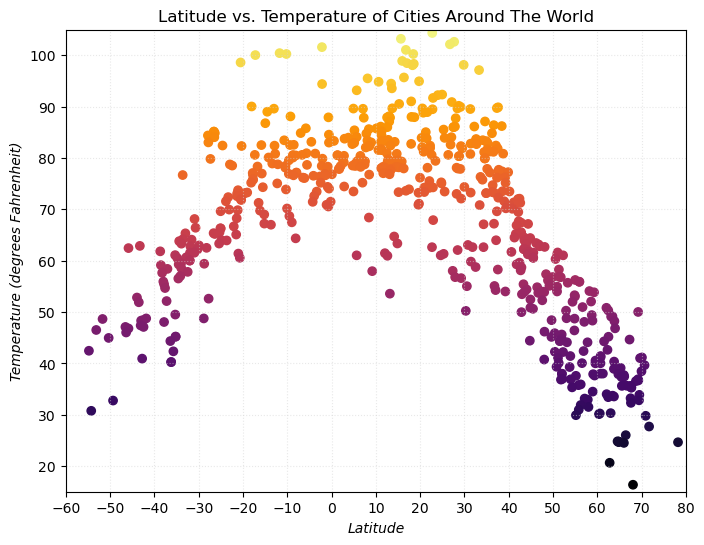

In [8]:
# Build scatter plot for latitude vs. Temperature.
# Step 1: data.
x = city_data_df.sort_values(by = 'Max Temp', ascending = False)['Lat']
y = city_data_df.sort_values(by = 'Max Temp', ascending = False)['Max Temp']

# Step 2: canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.scatter(x, 
            y,
            c = y,
            cmap = 'inferno')

# Step 4: formatting.
plt.title('Latitude vs. Temperature of Cities Around The World', fontsize = 12)

plt.xlabel('Latitude', fontsize = 10, fontstyle = 'italic')
plt.xticks(np.arange(-100, 100, 10))
plt.xlim(-60, 80)

plt.ylabel('Temperature (degrees Fahrenheit)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(0, 150, 10))
plt.ylim(15, 105)

plt.grid(color = 'lightgray', linestyle = 'dotted', alpha = .5)

# Step 5: save/show.
plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

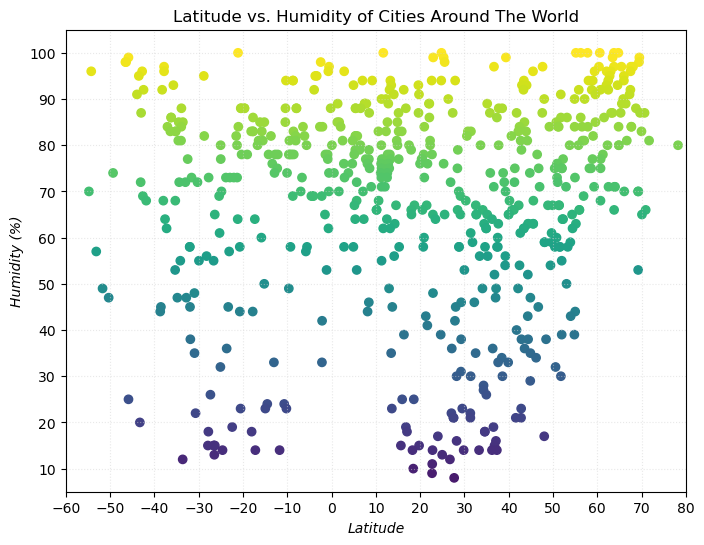

In [9]:
# Build the scatter plots for latitude vs. Humidity.
# Step 1: data.
x = city_data_df.sort_values(by = 'Humidity', ascending = False)['Lat']
y = city_data_df.sort_values(by = 'Humidity', ascending = False)['Humidity']

# Step 2: canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.scatter(x, 
            y,
            c = y,
            cmap = 'viridis')

# Step 4: formatting.
plt.title('Latitude vs. Humidity of Cities Around The World', fontsize = 12)

plt.xlabel('Latitude', fontsize = 10, fontstyle = 'italic')
plt.xticks(np.arange(-100, 100, 10))
plt.xlim(-60, 80)

plt.ylabel('Humidity (%)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(0, 150, 10))
plt.ylim(5, 105)

plt.grid(color = 'lightgray', linestyle = 'dotted', alpha = .5)

# Step 5: save/show.
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

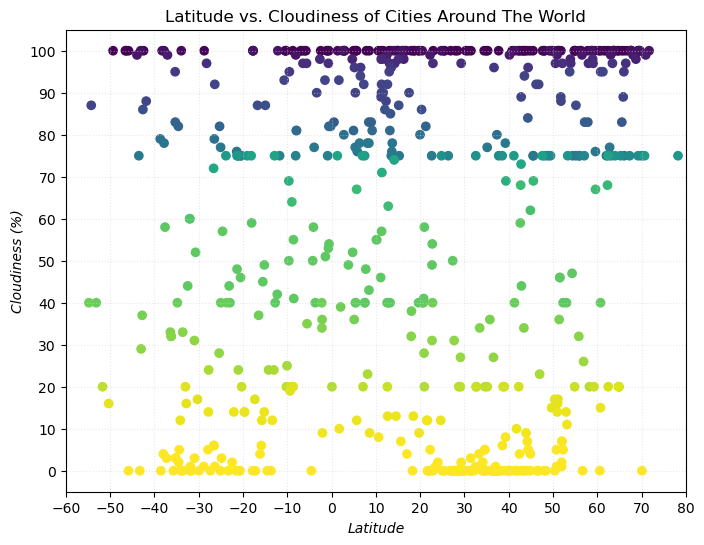

In [10]:
# Build the scatter plots for latitude vs. Cloudiness.
# Step 1: data.
x = city_data_df.sort_values(by = 'Cloudiness', ascending = False)['Lat']
y = city_data_df.sort_values(by = 'Cloudiness', ascending = False)['Cloudiness']

# Reversed for cmap so that our lower 'cloudiness' values show up as yellow and higher ones show up as dark purple.
c = city_data_df.sort_values(by = 'Cloudiness', ascending = True)['Cloudiness']

# Step 2: canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.scatter(x, 
            y,
            c = c,
            cmap = 'viridis')

# Step 4: formatting.
plt.title('Latitude vs. Cloudiness of Cities Around The World', fontsize = 12)

plt.xlabel('Latitude', fontsize = 10, fontstyle = 'italic')
plt.xticks(np.arange(-100, 100, 10))
plt.xlim(-60, 80)

plt.ylabel('Cloudiness (%)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(0, 150, 10))
plt.ylim(-5, 105)

plt.grid(color = 'lightgray', linestyle = 'dotted', alpha = .5)

# Step 5: save/show.
plt.savefig("output_data/Fig3.png")
plt.show()


#### Latitude vs. Wind Speed Plot

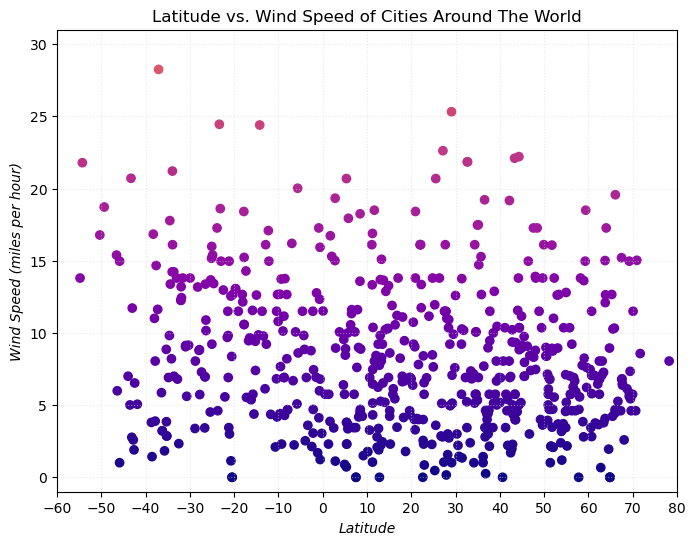

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
x = city_data_df.sort_values(by = 'Wind Speed', ascending = False)['Lat']
y = city_data_df.sort_values(by = 'Wind Speed', ascending = False)['Wind Speed']

# Step 2: canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.scatter(x, 
            y,
            c = y,
            cmap = 'plasma')

# Step 4: formatting.
plt.title('Latitude vs. Wind Speed of Cities Around The World', fontsize = 12)

plt.xlabel('Latitude', fontsize = 10, fontstyle = 'italic')
plt.xticks(np.arange(-100, 100, 10))
plt.xlim(-60, 80)

plt.ylabel('Wind Speed (miles per hour)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(0, 50, 5))
plt.ylim(-1, 31)

plt.grid(color = 'lightgray', linestyle = 'dotted', alpha = .5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_regress_plot(x_values, 
                     y_values,
                     c_values = None,
                     cmap_name = 'inferno',
                     s_values = None,
                     a_title = '', 
                     x_label = '',
                     x_ticks = None,
                     x_lim = [None, None],
                     y_label = '',
                     y_ticks = None,
                     y_lim = [None, None],
                     grid_values = {'color': 'lightgray', 'linestyle': 'dotted', 'alpha': .5},
                     reg_color = 'firebrick',
                     figname = 'sample.png'):

    # Do linear regression with 'linregress'
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Step 2: canvas.
    plt.figure(figsize=(8, 6))

    # Step 3: skeleton plot.
    plt.scatter(x_values,
                y_values,
                c = c_values if c_values != None else x_values,
                cmap = cmap_name,
                s = s_values)
    plt.plot(x_values, 
             regress_values, 
             color = reg_color)

    # Step 4: formatting.
    plt.title(a_title, fontsize = 12)

    plt.xlabel(x_label, fontsize = 10, fontstyle = 'italic')
    plt.xticks(x_ticks)
    plt.xlim(x_lim[0], x_lim[1])
    
    plt.ylabel(y_label, fontsize = 10, fontstyle = 'italic')
    plt.yticks(y_ticks)
    plt.ylim(y_lim[0], y_lim[1])

    # Set the 'line_eq' to appear in the bottom-left side of the plot.
    # This works well on average and doesn't require insane math to figure out where whitespace is on the canvas.
    plt.text(plt.xlim()[0],
             plt.ylim()[0],
             line_eq + ' | r-squared: ' + str(round(rvalue**2, 2)),
             color = reg_color)

    plt.grid(color = grid_values.get('color'), 
             linestyle = grid_values.get('linestyle'), 
             alpha = grid_values.get('alpha'))

    # Step 5: show/save.
    plt.savefig(figname)
    plt.show()

    return None

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0).
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bethel,41.3712,-73.4140,71.02,75,100,5.75,US,1727975854
4,monrovia,6.3005,-10.7969,79.66,79,78,10.56,LR,1727975857
5,louga,58.7372,29.8453,49.41,92,100,3.85,RU,1727975858
8,yellowknife,62.4560,-114.3525,33.42,94,20,8.05,CA,1727975862
10,newman,37.3138,-121.0208,89.74,14,0,4.41,US,1727975839


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0).
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,32.76,74,100,18.72,TF,1727975852
1,puerto ayora,-0.7393,-90.3518,70.56,96,97,5.99,EC,1727975853
3,puerto natales,-51.7236,-72.4875,48.65,49,20,41.43,CL,1727975855
6,pisco,-13.7000,-76.2167,67.01,82,0,11.50,PE,1727975859
7,kone,-21.0595,164.8658,61.39,84,24,3.00,NC,1727975860


###  Temperature vs. Latitude Linear Regression Plot

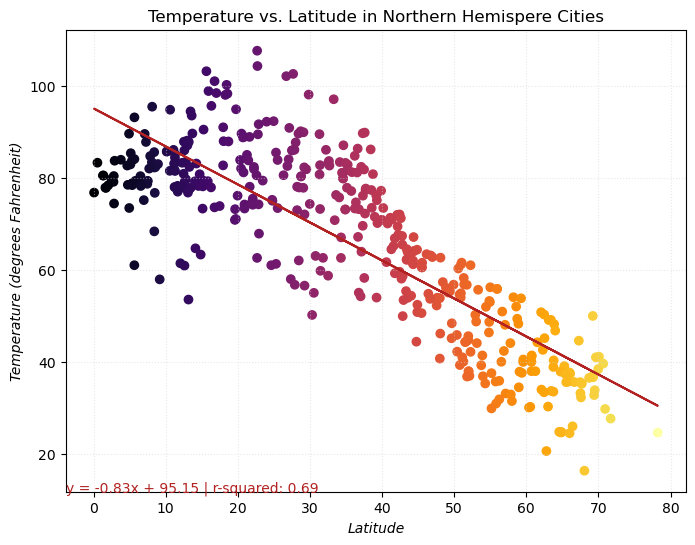

In [15]:
# Linear regression on Northern Hemisphere
lin_regress_plot(northern_hemi_df.sort_values(by = 'Max Temp', ascending = False)['Lat'],
                 northern_hemi_df.sort_values(by = 'Max Temp', ascending = False)['Max Temp'],
                 a_title = 'Temperature vs. Latitude in Northern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Temperature (degrees Fahrenheit)')


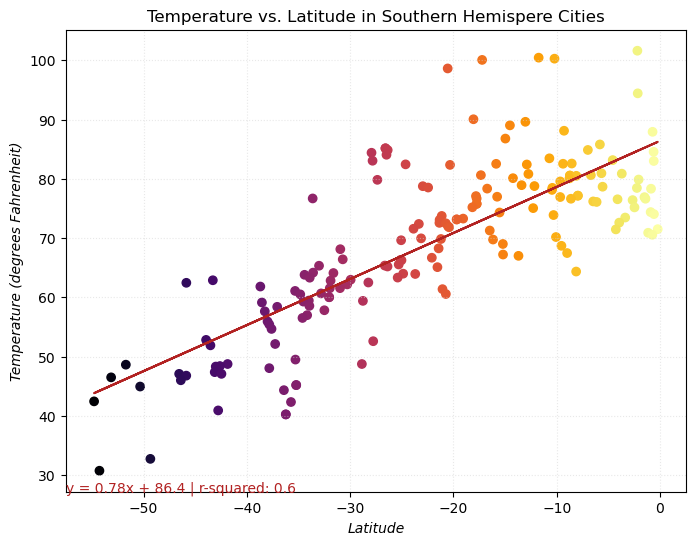

In [16]:
# Linear regression on Southern Hemisphere
lin_regress_plot(southern_hemi_df.sort_values(by = 'Max Temp', ascending = False)['Lat'],
                 southern_hemi_df.sort_values(by = 'Max Temp', ascending = False)['Max Temp'],
                 a_title = 'Temperature vs. Latitude in Southern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Temperature (degrees Fahrenheit)')

**Considering that some of the hottest avg. temperatures that the Earth has are around the Equator. It makes sense that as the latitude approaches 0, the temperature is higher.

**The data for the northern and southern hemisphere both have pretty strong relationships.

### Humidity vs. Latitude Linear Regression Plot

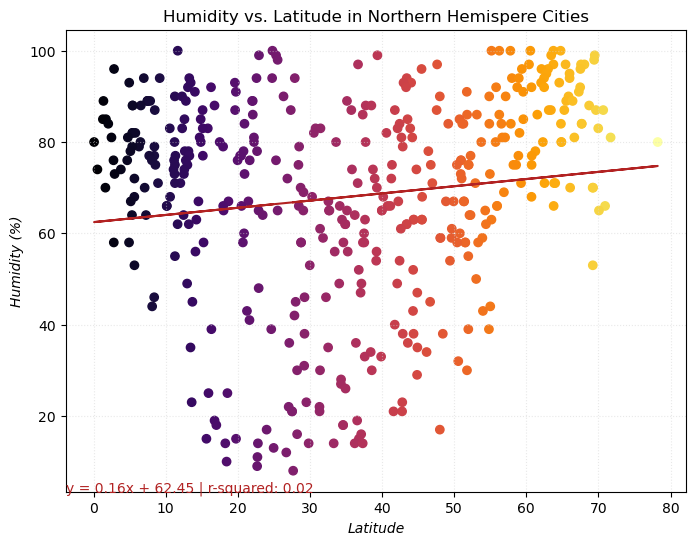

In [17]:
## Northern Hemisphere
lin_regress_plot(northern_hemi_df.sort_values(by = 'Humidity', ascending = False)['Lat'],
                 northern_hemi_df.sort_values(by = 'Humidity', ascending = False)['Humidity'],
                 a_title = 'Humidity vs. Latitude in Northern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Humidity (%)')

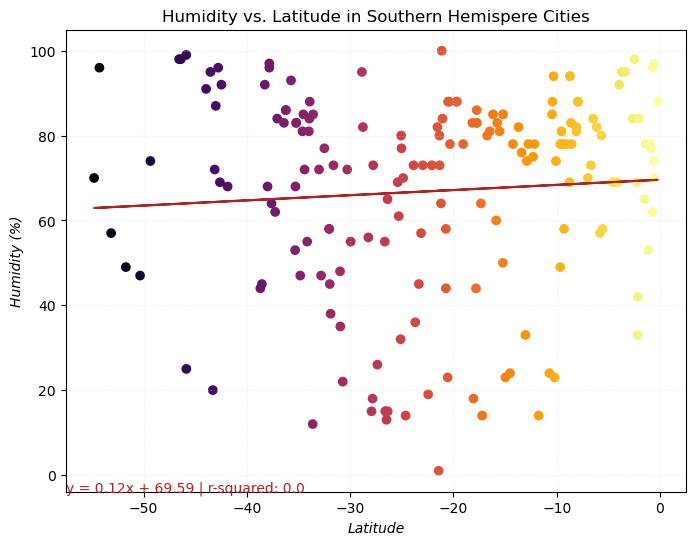

In [18]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df.sort_values(by = 'Humidity', ascending = False)['Lat'],
                 southern_hemi_df.sort_values(by = 'Humidity', ascending = False)['Humidity'],
                 a_title = 'Humidity vs. Latitude in Southern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Humidity (%)')


**The data is spread out too much for there to be a relationship between these values.

### Cloudiness vs. Latitude Linear Regression Plot

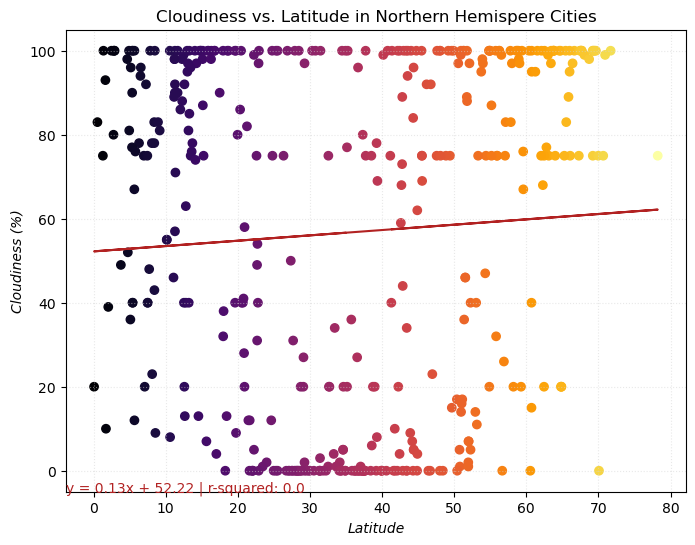

In [19]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df.sort_values(by = 'Cloudiness', ascending = False)['Lat'],
                 northern_hemi_df.sort_values(by = 'Cloudiness', ascending = False)['Cloudiness'],
                 a_title = 'Cloudiness vs. Latitude in Northern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Cloudiness (%)')

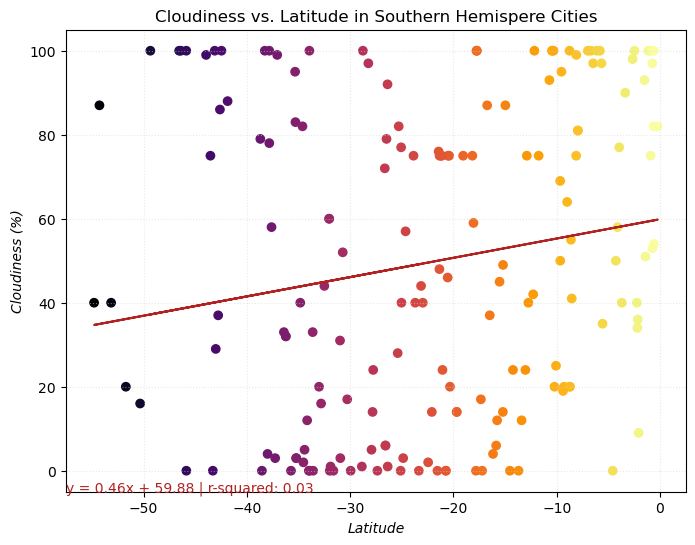

In [20]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df.sort_values(by = 'Cloudiness', ascending = False)['Lat'],
                 southern_hemi_df.sort_values(by = 'Cloudiness', ascending = False)['Cloudiness'],
                 a_title = 'Cloudiness vs. Latitude in Southern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Cloudiness (%)')

**No relationship exists between the two.

### Wind Speed vs. Latitude Linear Regression Plot

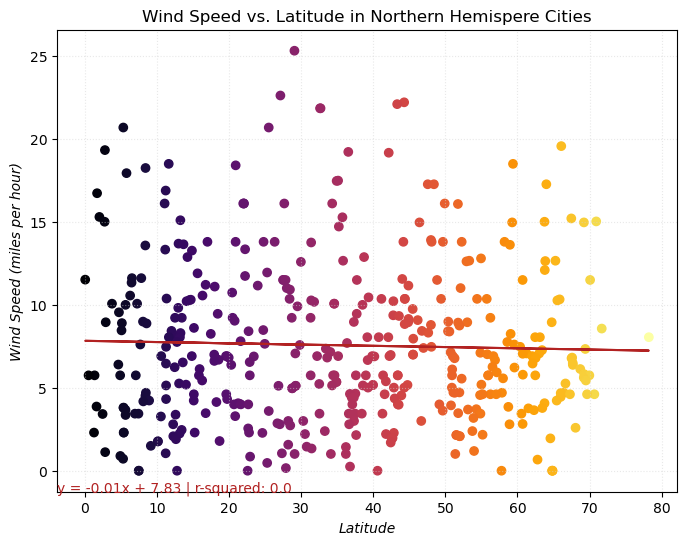

In [21]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df.sort_values(by = 'Wind Speed', ascending = False)['Lat'],
                 northern_hemi_df.sort_values(by = 'Wind Speed', ascending = False)['Wind Speed'],
                 a_title = 'Wind Speed vs. Latitude in Northern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Wind Speed (miles per hour)')

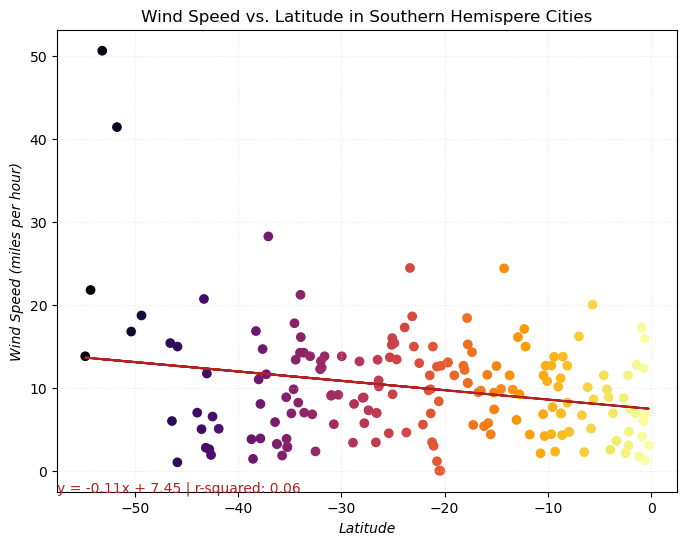

In [22]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df.sort_values(by = 'Wind Speed', ascending = False)['Lat'],
                 southern_hemi_df.sort_values(by = 'Wind Speed', ascending = False)['Wind Speed'],
                 a_title = 'Wind Speed vs. Latitude in Southern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Wind Speed (miles per hour)')

**Very little to no relationship here as well.